# Exploratory data analysis

This notebook aims to familiarize with the dataset through the following steps:

- **Data preparation:** cleaning, handling missing values, and data formatting
- **Exploratory data analysis (EDA):** visualizations, identifying patterns

These steps provide a deeper understanding of the dataset before proceeding to predictive modeling.


In [4]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# basic imports
import re
import numpy as np
import pandas as pd

# figures
import matplotlib.pyplot as plt
import seaborn as sns

# configure logger
import logging

from src.data_processing import EmbeddingLoader, MovieReviewsProcessor, DataVisualizer


In [2]:
base_path = ".."
aclImdb_path = os.path.join(base_path, "data/raws/aclImdb")
emb_loader = EmbeddingLoader(os.path.join(aclImdb_path, "imdbEr.txt"), os.path.join(aclImdb_path, "imdb.vocab"))
emb_loader.load_embeddings() 
_ = emb_loader.save_stopwords(os.path.join(aclImdb_path, "stop_word_rate.txt"))

06:06:55 INFO:Loading embedding vectors...
06:06:55 INFO:Loaded vectors with shape: (89527,)
06:06:55 INFO:Loading words...
06:06:55 INFO:Loaded 89527 words
06:06:55 INFO:Loaded 89527 words and embeddings.
06:06:56 INFO:Stopwords saved successfully to ../data/raws/aclImdb/stop_word_rate.txt


Nombre de stop words détectés : 63286


In [3]:
train_pos_path = os.path.join(aclImdb_path, "train/pos")
train_neg_path = os.path.join(aclImdb_path, "train/neg") 
test_pos_path = os.path.join(aclImdb_path, "test/pos") 
test_neg_path = os.path.join(aclImdb_path, "test/neg")

# Creation of the train and test datasets
df_train = MovieReviewsProcessor.create_dataset(pos_reviews_path=train_pos_path, neg_reviews_path=train_neg_path, save_path=os.path.join(base_path, "data/processed/datasets/df_train.csv"))
df_test = MovieReviewsProcessor.create_dataset(pos_reviews_path=test_pos_path, neg_reviews_path=test_neg_path, save_path=os.path.join(base_path, "data/processed/datasets/df_test.csv"))


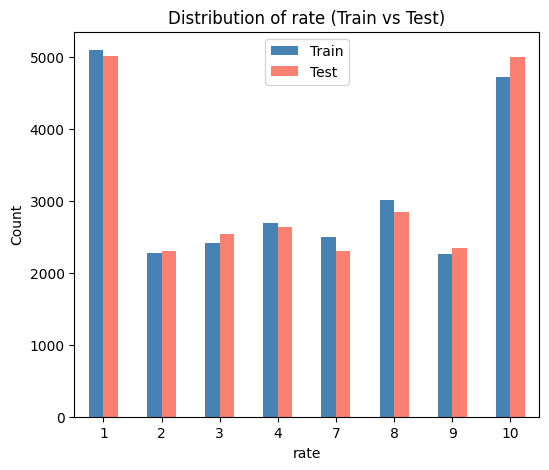

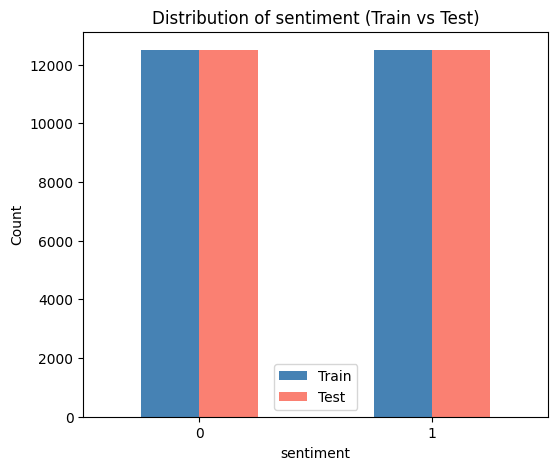

In [7]:
#check train/test distribution

for column in ['rate', 'sentiment']:
    # Plot distribution
    train_counts = df_train[column].value_counts().sort_index()
    test_counts = df_test[column].value_counts().sort_index()

    df_counts = pd.DataFrame({
        'Train': train_counts,
        'Test': test_counts
    })

    df_counts.plot(kind='bar', figsize=(6, 5), title=f'Distribution of {column} (Train vs Test)', color=['steelblue', 'salmon'])
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()


In [9]:
visualizer_train = DataVisualizer(df_train)
visualizer_test = DataVisualizer(df_test)

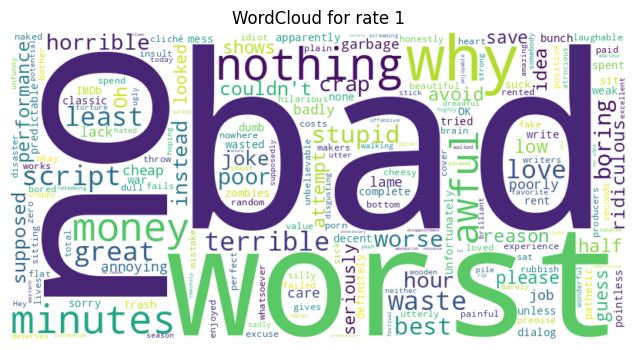

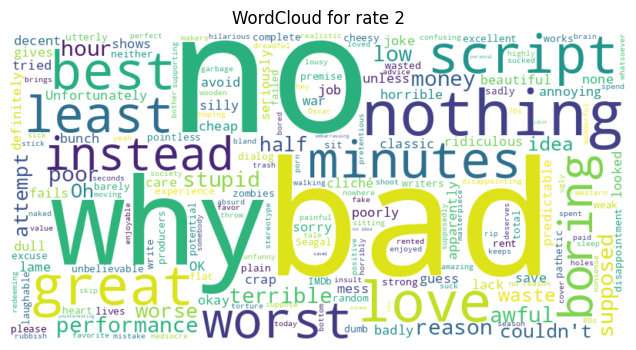

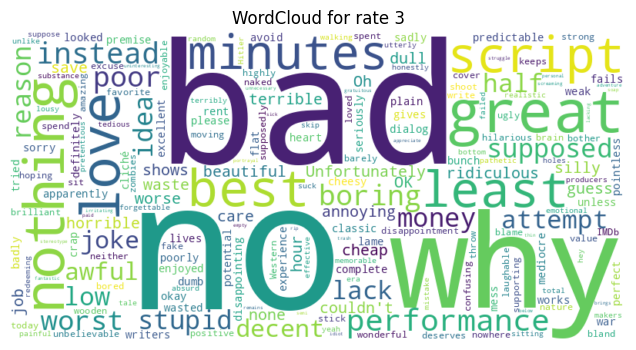

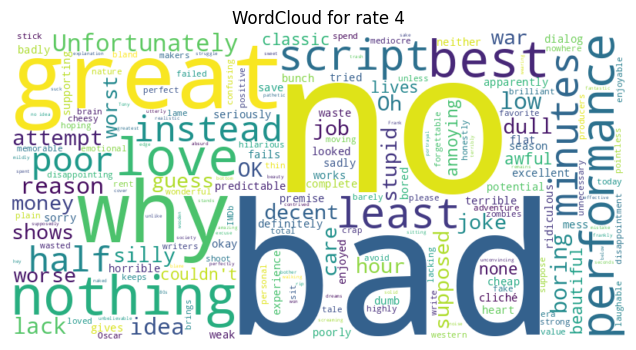

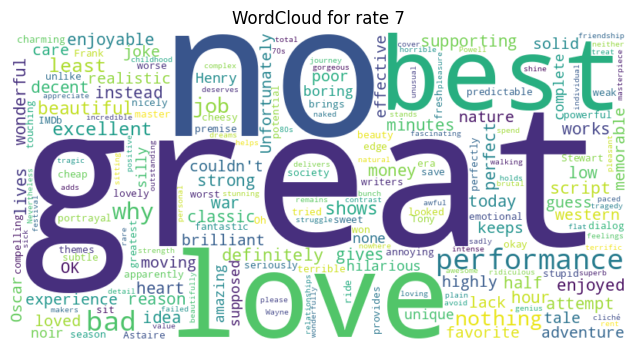

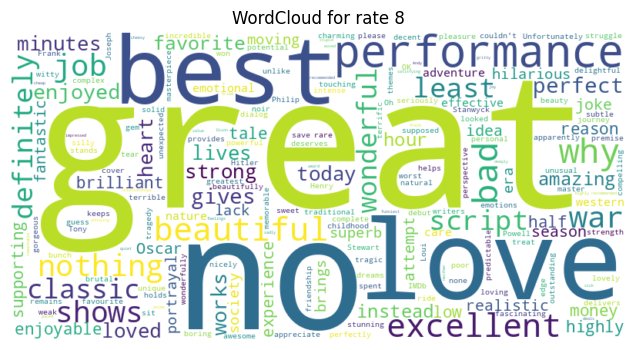

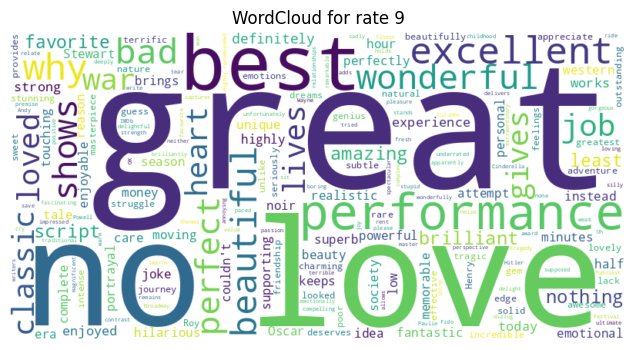

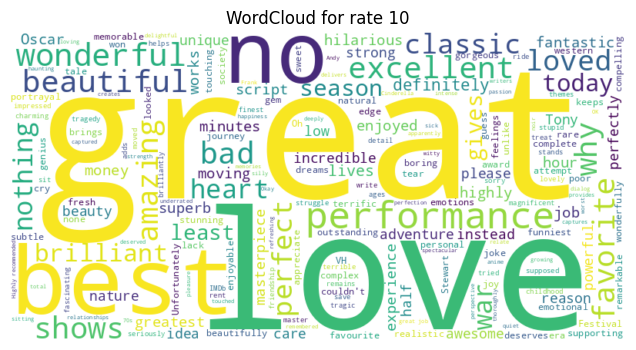

In [10]:
#wordcloud depending on rates
visualizer_train.generate_wordcloud(stopwords=emb_loader.stopwords, col='rate')


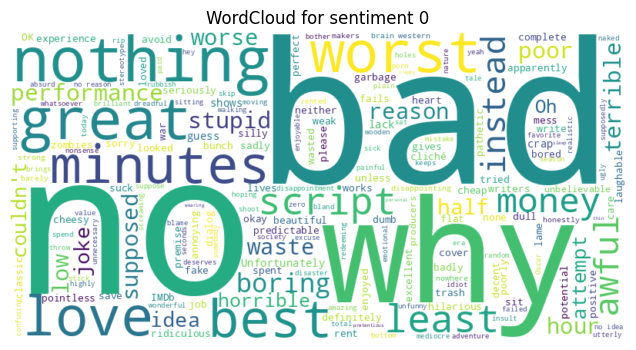

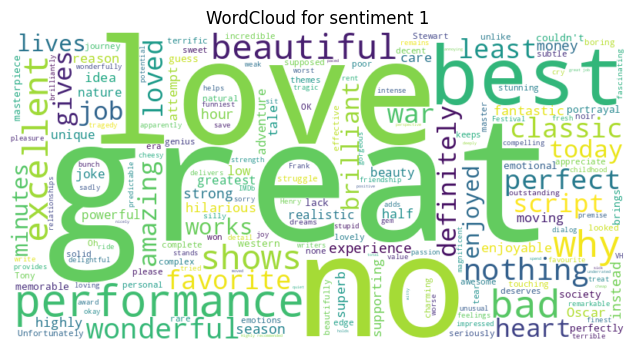

In [14]:
#wordcloud depending on sentiment
visualizer_train.generate_wordcloud(stopwords=emb_loader.stopwords, col='sentiment')

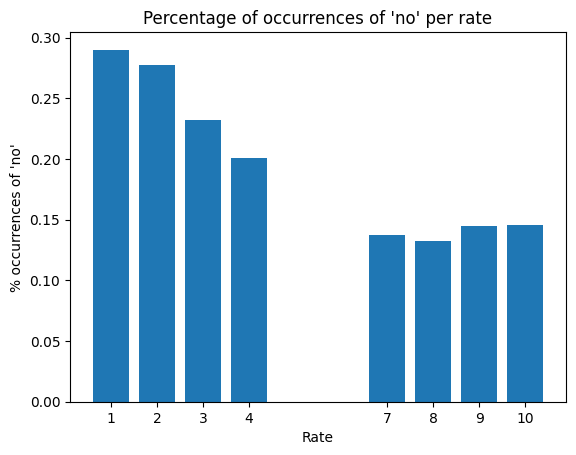

In [11]:
visualizer_train.visualize_word_occurrence(word='no')

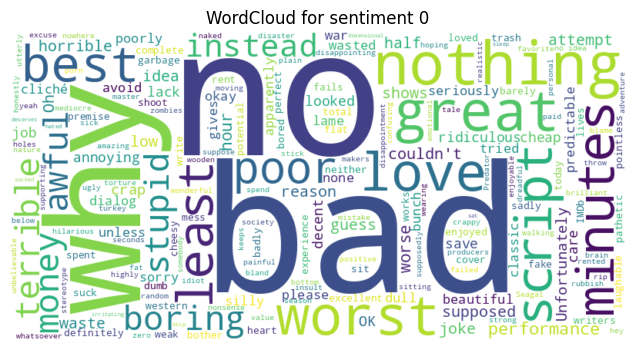

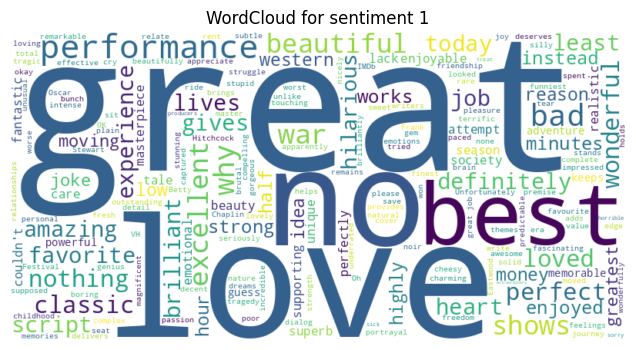

In [12]:
#quick check on test set
visualizer_test.generate_wordcloud(stopwords=emb_loader.stopwords, col='sentiment')